# Term Project Final Report

#### 2021103436 글로벌커뮤니케이션학부 윤서인

### 가설 정의

가설 1: 타율이 높을수록 홈런 개수가 많을 것이다 <br>
가설 2: WAR가 높을수록 타율이 높을 것이다 <br>
가설 3: 타율이 3할이 넘는 선수가 많을수록 팀 순위가 높을 것이다

### 계획과 실행 

데이터는 초반 계획대로 STATIZ에서 데이터를 수집하였다. 10년간의 자료를 수집하였고, 이를 한 excel 파일에 정리하였다. <br>
팀 순위의 경우, KBO 홈페이지 기록실에 나와 있어서 해당 자료를 사용하였다. <br>
자료를 사용함에 있어서 문제가 전혀 없었으며, 계획 밖의 일이 발생하지 않았다.

### 결과 

#### 0. 가설 실행 전 확인 작업

가설 1, 2에 활용할 자료들이 잘 열리는지 확인하고, pandas와 matplotlib, numpy를 호출한다. 한국어 호환이 되지 않을 상황을 고려하여 ttf 또한 호출한다.

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
font_path="korean.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [5]:
import numpy as np

#### 가설 1: 타율이 높을수록 홈런 개수가 많을 것이다 

In [6]:
df=pd.read_excel("2013~2023 타자 순위.xlsx")
newdf=df[['이름','홈런', '타율']]
n=newdf.sort_values('홈런')
n

,이름,홈런,타율
116,박민우19,1,0.344
70,홍창기23,1,0.332
112,박민우17,3,0.363
110,김혜성21,3,0.304
83,이용규15,4,0.341
...,...,...,...
3,로하스20,47,0.349
0,테임즈15,47,0.381
24,나바로15,48,0.287
30,박병호14,52,0.303


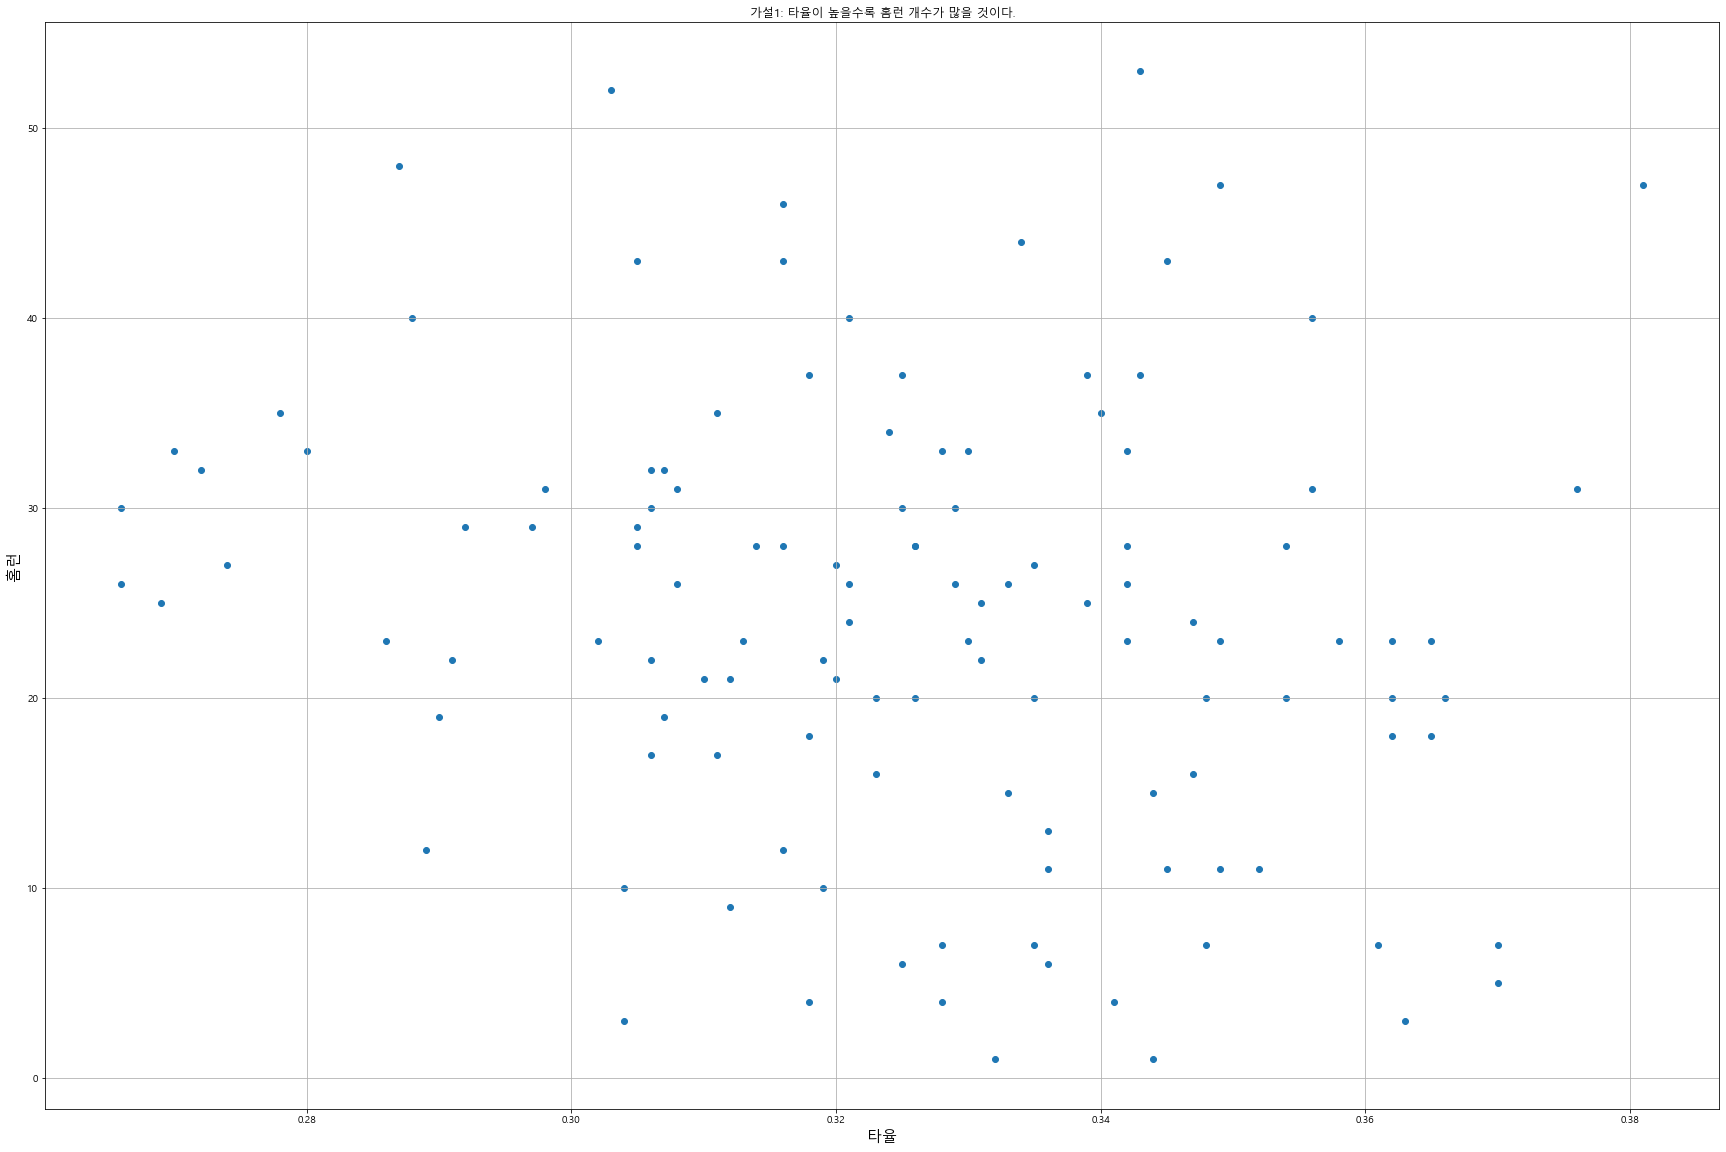

In [7]:
plt.figure(figsize=(30,20))
plt.scatter(n.타율, n.홈런)
plt.title("가설1: 타율이 높을수록 홈런 개수가 많을 것이다.")
plt.xlabel("타율", size=15)
plt.ylabel("홈런", size=15)
plt.grid(True)
plt.show()

#### 결과 

홈런 개수와 타율 사이의 상관관계가 두드러지지 않는 것으로 나타났다. 사실 타율은 "안타를 타수로 나눈 것"이다. 아무리 홈런을 많이 치더라도, 안타 개수가 적으면 타율의 증가라는 결과를 마주할 수 없게 된다. 타율보다는 장타율 (1루타, 2루타, 3루타, 홈런의 가치를 모두 동등하게 평가하여 진루에 따른 가중치를 주어 보정해준 것)을 분석 했더라면 유의미한 상관관계가 도출되었을 것 같다.

#### 가설 2: WAR가 높을수록 홈런 개수가 많을 것이다.

In [8]:
newdf2=df[['이름','WAR', '타율']]
newdf2
n2=newdf2.sort_values('WAR')
n2

,이름,WAR,타율
119,박건우21,4.62,0.325
116,박민우19,4.66,0.344
118,최주환18,4.66,0.333
117,정성훈13,4.66,0.312
115,김재환20,4.68,0.266
...,...,...,...
4,박병호15,7.76,0.343
3,로하스20,7.76,0.349
2,강정호14,8.05,0.356
1,이정후22,9.23,0.349


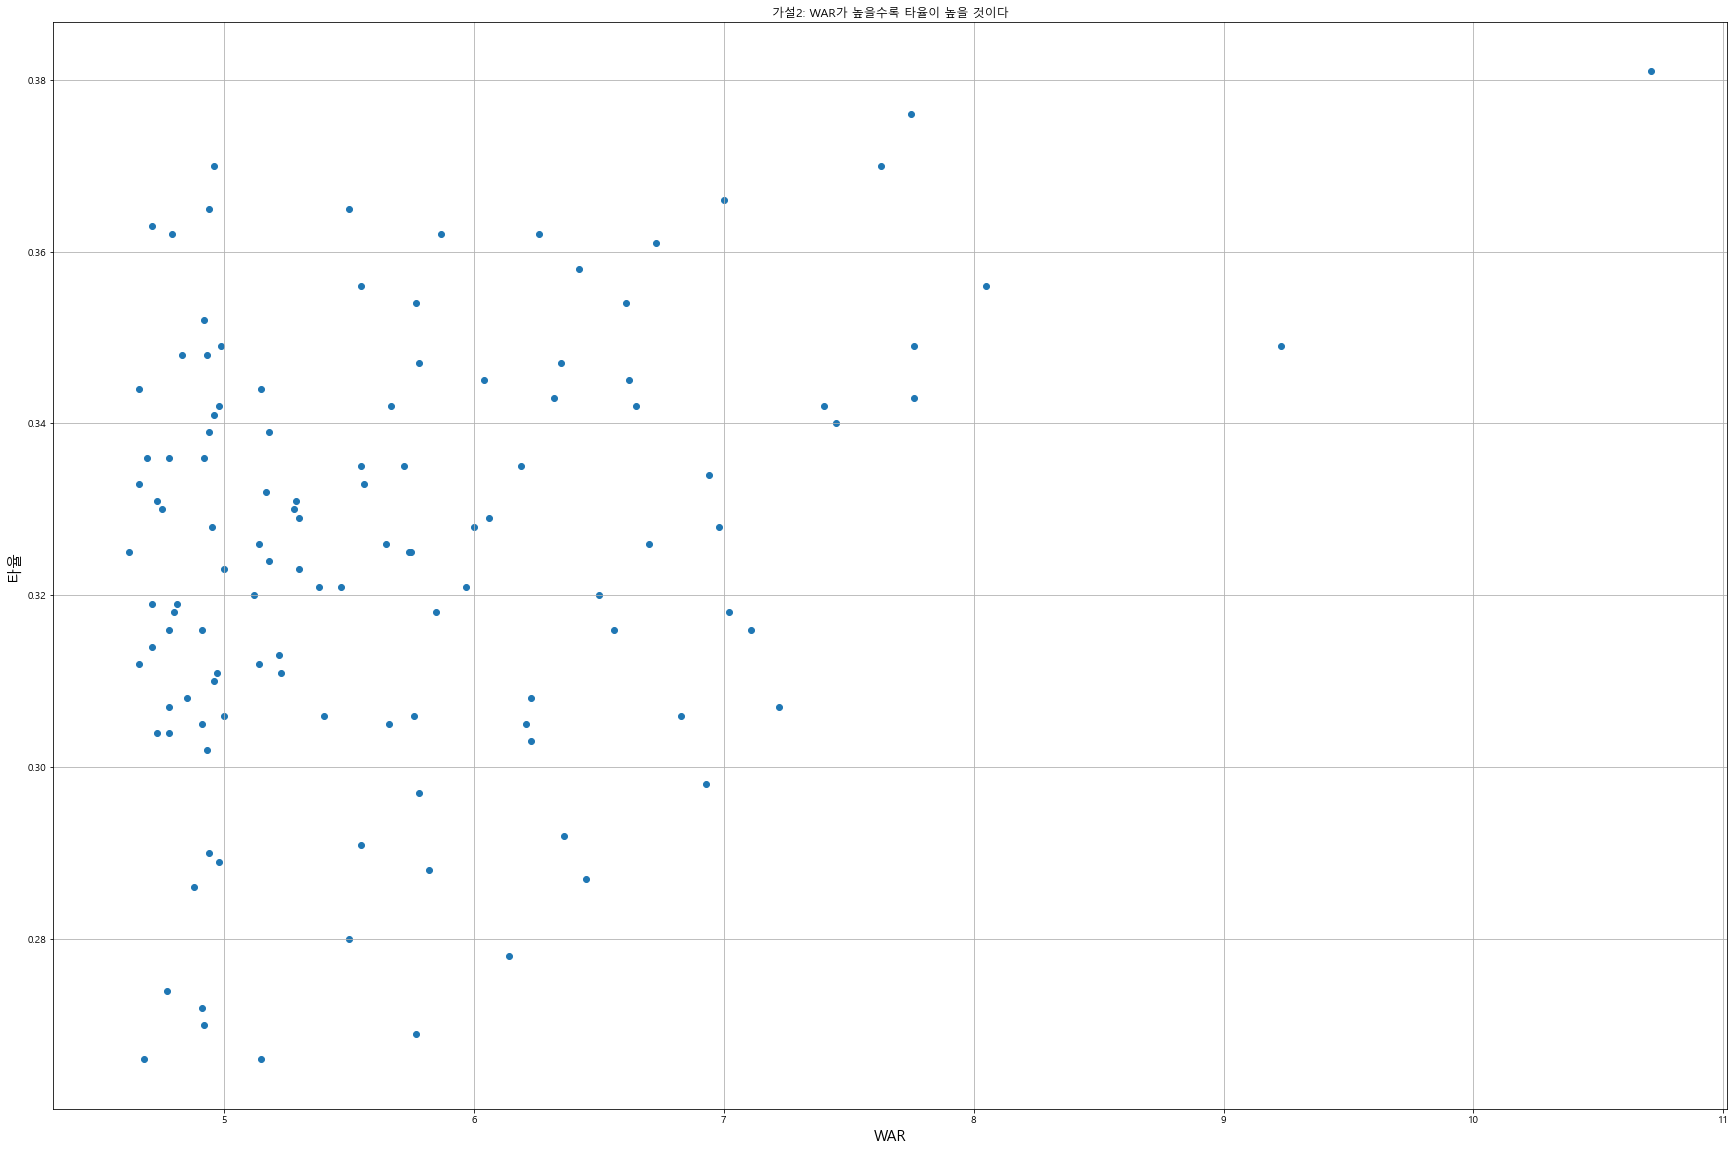

In [9]:
plt.figure(figsize=(30,20))
plt.scatter(n2.WAR, n2.타율)
plt.title("가설2: WAR가 높을수록 타율이 높을 것이다")
plt.xlabel("WAR", size=15)
plt.ylabel("타율", size=15)
plt.grid(True)
plt.show()

#### 결과 

WAR은 Win Above Replacement의 약자이며, 대체선수 (replacement player)에 비해 얼마나 많은 승리를 기여했는가를 나타내는 수치이다. 예를 들어서, 한 선수의 WAR이 3.56이라면, 이 선수는 다른 대체 선수에 비하여 팀에 3.6승 정도 더 기여했다는 것이다. WAR은 타격 혹은 투구만을 평가하는 것이 아니라 타격, 투구, 수비 전체를 포괄할 뿐만 아니라 구장의 상태, 리그의 난이도 등을 포함한다. 이를 명확하게 계산하는 공식은 없으며, 현재까지 가장 정확하고 까다로운 지표로 통한다. <br>
상술하였듯, WAR에는 다양한 조건이 들어간다. 따라서 홈런 개수가 많다고 해서 WAR이 절대적으로 높지 않다. WAR을 보고 한 선수의 홈런 개수를 판단하기 어렵다. <br>
따라서 해당 가설 또한 상관관계가 없다.

#### 가설 3: 타율이 3할이 넘는 선수가 많을수록 팀 순위가 높을 것이다. 

In [10]:
team_df_2013=pd.read_excel("2013 팀순위.xlsx")
team_df_2014=pd.read_excel("2014 팀순위.xlsx")
team_df_2015=pd.read_excel("2015 팀순위.xlsx")
team_df_2016=pd.read_excel("2016 팀순위.xlsx")
team_df_2017=pd.read_excel("2017 팀순위.xlsx")
team_df_2018=pd.read_excel("2018 팀순위.xlsx")
team_df_2019=pd.read_excel("2019 팀순위.xlsx")
team_df_2020=pd.read_excel("2020 팀순위.xlsx")
team_df_2021=pd.read_excel("2021 팀순위.xlsx")
team_df_2022=pd.read_excel("2022 팀순위.xlsx")
team_df_2023=pd.read_excel("2023 팀순위.xlsx")

In [11]:
hypo3_df=df[['이름', '연도', '팀', '타율']]
hypo3_df.sort_values(['연도'])

,이름,연도,팀,타율
56,강정호13,13,키움,0.291
85,박용택13,13,LG,0.328
11,박병호13,13,키움,0.318
10,최정13,13,SSG,0.316
40,박석민13,13,삼성,0.318
...,...,...,...,...
67,오스틴23,23,LG,0.313
42,최정23,23,SSG,0.297
33,김혜성23,23,키움,0.335
70,홍창기23,23,LG,0.332


In [12]:
team_df_2013

,팀명,경기,승,패,무,타율,평균자책점,승률
0,삼성 라이온즈,128,75,51,2,0.283,3.98,0.595
1,두산 베어스,128,71,54,3,0.289,4.57,0.568
2,LG 트윈스,128,74,54,0,0.282,3.72,0.578
3,넥센 히어로즈,128,72,54,2,0.272,4.12,0.571
4,롯데 자이언츠,128,66,58,4,0.261,3.93,0.532
5,SK 와이번스,128,62,63,3,0.265,4.16,0.496
6,NC 다이노스,128,52,72,4,0.244,3.96,0.419
7,KIA 타이거즈,128,51,74,3,0.261,5.12,0.408
8,한화 이글스,128,42,85,1,0.259,5.31,0.331
9,합계,576,565,565,11,0.268,4.32,0.500


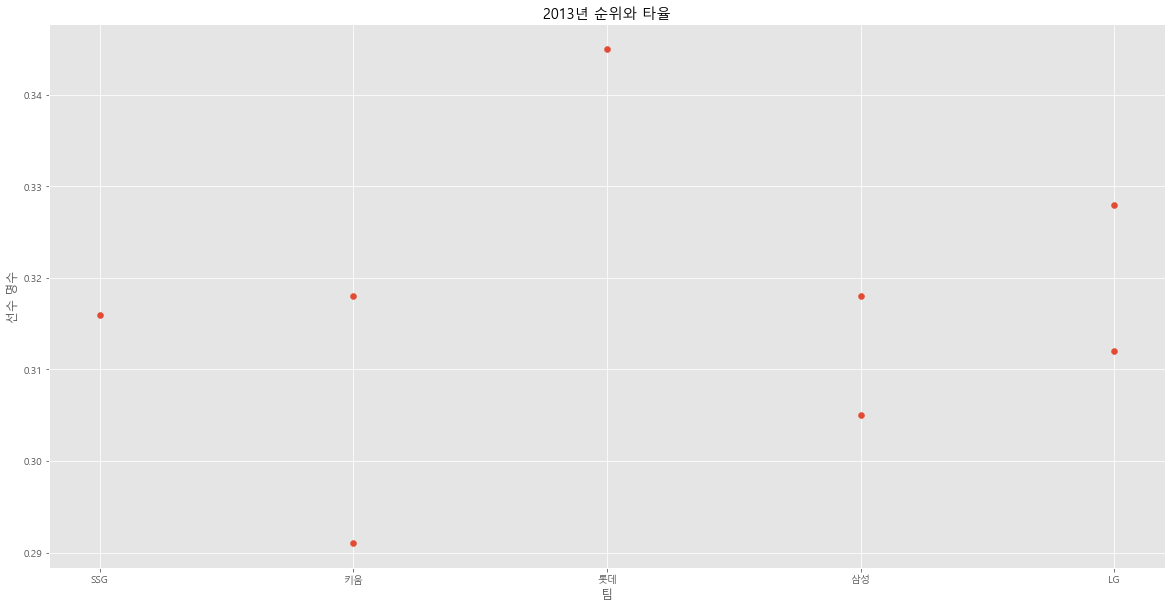

In [13]:
hypo3_df_2013=hypo3_df.loc[hypo3_df.연도==13]
hypo3_df_2013.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2013년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2013.팀, hypo3_df_2013.타율)
plt.show()

In [14]:
team_df_2014

,팀명,경기,승,패,무,타율,평균자책점,승률
0,삼성 라이온즈,128,78,47,3,0.301,4.52,0.624
1,넥센 히어로즈,128,78,48,2,0.298,5.25,0.619
2,NC 다이노스,128,70,57,1,0.282,4.29,0.551
3,LG 트윈스,128,62,64,2,0.279,4.58,0.492
4,SK 와이번스,128,61,65,2,0.291,5.51,0.484
5,두산 베어스,128,59,68,1,0.293,5.43,0.465
6,롯데 자이언츠,128,58,69,1,0.287,5.19,0.457
7,KIA 타이거즈,128,54,74,0,0.288,5.82,0.422
8,한화 이글스,128,49,77,2,0.283,6.35,0.389
9,합계,576,569,569,7,0.289,5.21,0.500


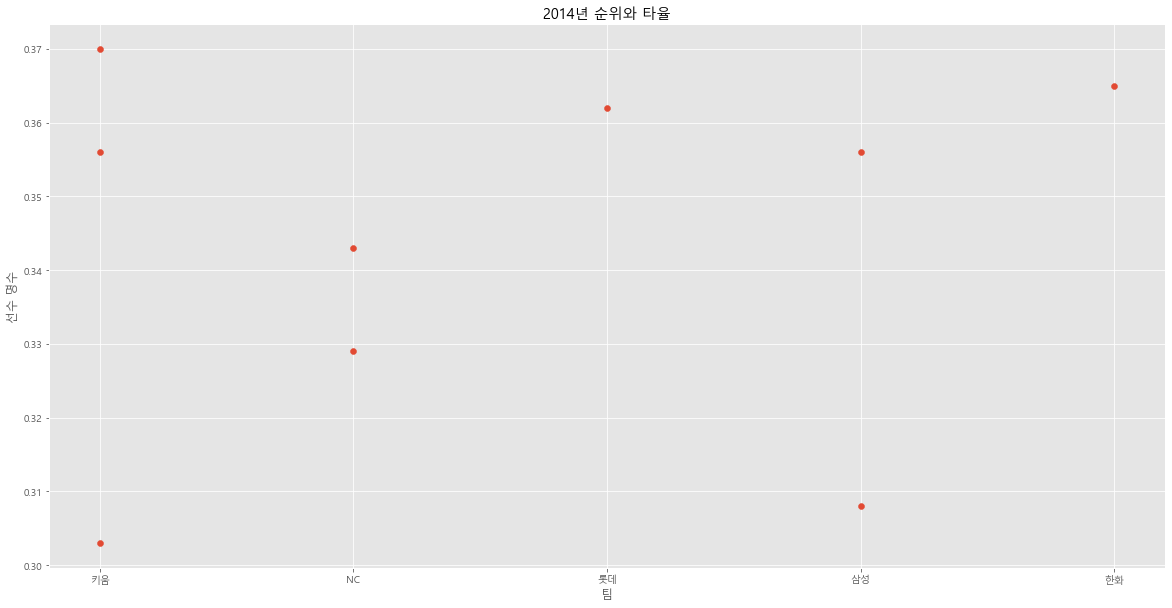

In [15]:
hypo3_df_2014=hypo3_df.loc[hypo3_df.연도==14]
hypo3_df_2014.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2014년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2014.팀, hypo3_df_2014.타율)
plt.show()

In [16]:
team_df_2015

,팀명,경기,승,패,무,타율,평균자책점,승률
0,두산 베어스,144,79,65,0,0.290,5.02,0.549
1,삼성 라이온즈,144,88,56,0,0.302,4.69,0.611
2,NC 다이노스,144,84,57,3,0.289,4.26,0.596
3,넥센 히어로즈,144,78,65,1,0.298,4.91,0.545
4,SK 와이번스,144,69,73,2,0.272,4.71,0.486
5,한화 이글스,144,68,76,0,0.271,5.11,0.472
6,KIA 타이거즈,144,67,77,0,0.251,4.79,0.465
7,롯데 자이언츠,144,66,77,1,0.280,5.07,0.462
8,LG 트윈스,144,64,78,2,0.269,4.62,0.451
9,KT 위즈,144,52,91,1,0.273,5.56,0.364


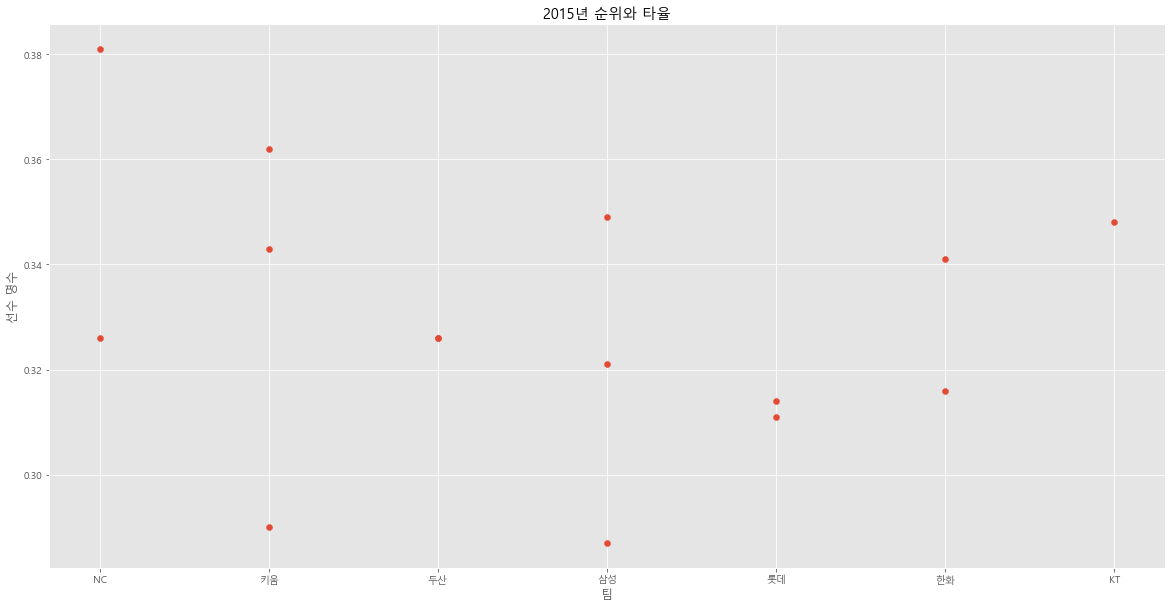

In [17]:
hypo3_df_2015=hypo3_df.loc[hypo3_df.연도==15]
hypo3_df_2015.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2015년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2015.팀, hypo3_df_2015.타율)
plt.show()

In [18]:
team_df_2016

,팀명,경기,승,패,무,타율,평균자책점,승률
0,두산 베어스,144,93,50,1,0.298,4.45,0.650
1,NC 다이노스,144,83,58,3,0.291,4.48,0.589
2,넥센 히어로즈,144,77,66,1,0.293,4.96,0.538
3,LG 트윈스,144,71,71,2,0.290,5.04,0.500
4,KIA 타이거즈,144,70,73,1,0.286,4.97,0.490
5,SK 와이번스,144,69,75,0,0.291,4.87,0.479
6,한화 이글스,144,66,75,3,0.289,5.76,0.468
7,롯데 자이언츠,144,66,78,0,0.288,5.63,0.458
8,삼성 라이온즈,144,65,78,1,0.293,5.64,0.455
9,KT 위즈,144,53,89,2,0.276,5.92,0.373


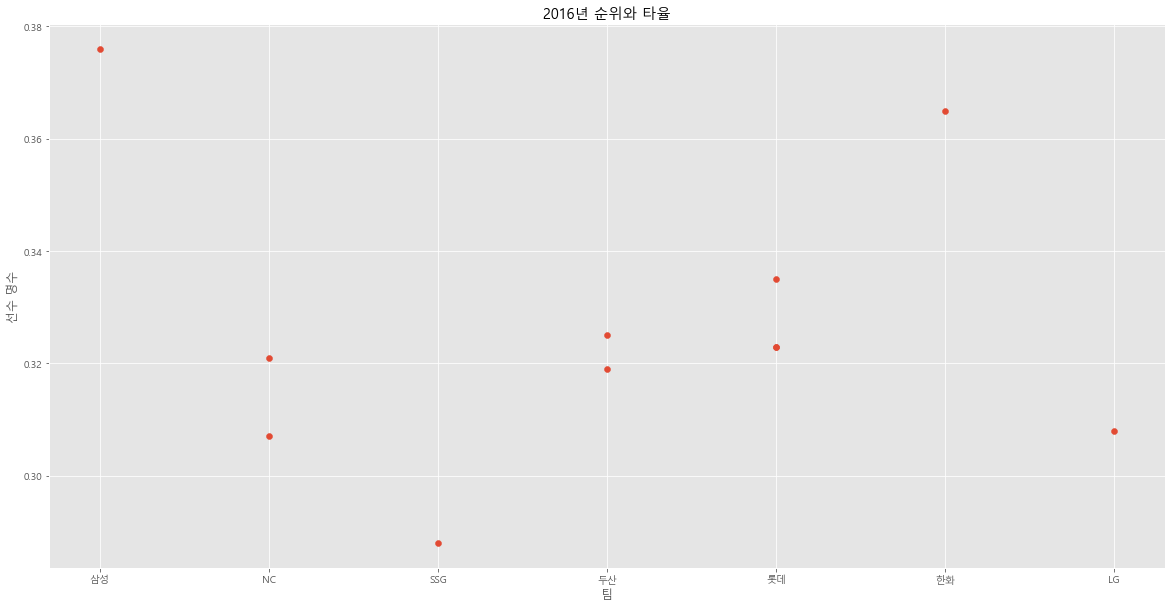

In [19]:
hypo3_df_2016=hypo3_df.loc[hypo3_df.연도==16]
hypo3_df_2016.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2016년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2016.팀, hypo3_df_2016.타율)
plt.show()

In [20]:
team_df_2017

,팀명,경기,승,패,무,타율,평균자책점,승률
0,KIA 타이거즈,144,87,56,1,0.302,4.79,0.608
1,두산 베어스,144,84,57,3,0.294,4.38,0.596
2,롯데 자이언츠,144,80,62,2,0.285,4.56,0.563
3,NC 다이노스,144,79,62,3,0.293,4.71,0.560
4,SK 와이번스,144,75,68,1,0.271,5.02,0.524
5,LG 트윈스,144,69,72,3,0.281,4.30,0.489
6,넥센 히어로즈,144,69,73,2,0.290,5.03,0.486
7,한화 이글스,144,61,81,2,0.287,5.28,0.430
8,삼성 라이온즈,144,55,84,5,0.279,5.88,0.396
9,KT 위즈,144,50,94,0,0.275,5.75,0.347


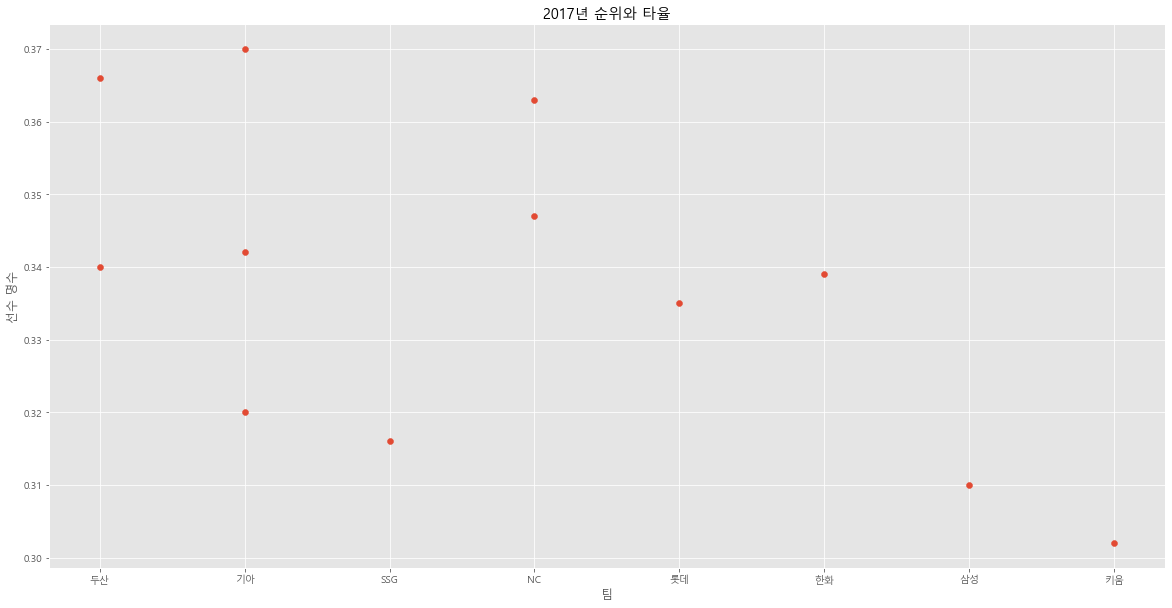

In [21]:
hypo3_df_2017=hypo3_df.loc[hypo3_df.연도==17]
hypo3_df_2017.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2017년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2017.팀, hypo3_df_2017.타율)
plt.show()

In [22]:
team_df_2018

,팀명,경기,승,패,무,타율,평균자책점,승률
0,SK 와이번스,144,78,65,1,0.281,4.67,0.545
1,두산 베어스,144,93,51,0,0.309,4.98,0.646
2,한화 이글스,144,77,67,0,0.275,4.93,0.535
3,넥센 히어로즈,144,75,69,0,0.288,5.08,0.521
4,KIA 타이거즈,144,70,74,0,0.295,5.40,0.486
5,삼성 라이온즈,144,68,72,4,0.288,5.19,0.486
6,롯데 자이언츠,144,68,74,2,0.289,5.37,0.479
7,LG 트윈스,144,68,75,1,0.293,5.29,0.476
8,KT 위즈,144,59,82,3,0.275,5.34,0.418
9,NC 다이노스,144,58,85,1,0.261,5.48,0.406


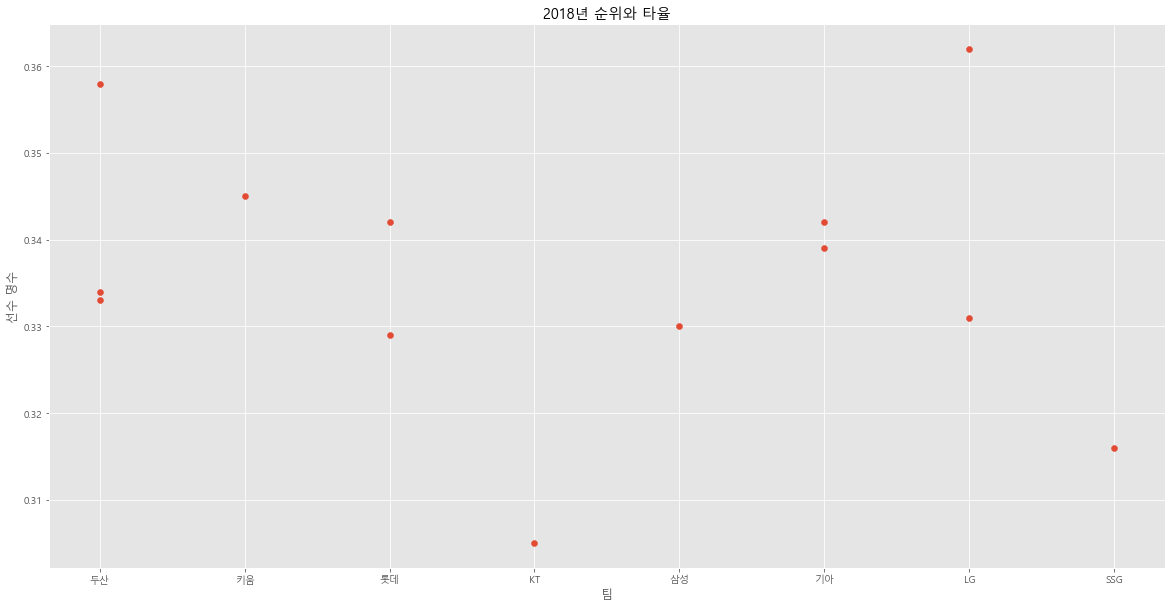

In [23]:
hypo3_df_2018=hypo3_df.loc[hypo3_df.연도==18]
hypo3_df_2018.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2018년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2018.팀, hypo3_df_2018.타율)
plt.show()

In [24]:
team_df_2019

,팀명,경기,승,패,무,타율,평균자책점,승률
0,두산 베어스,144,88,55,1,0.278,3.51,0.615
1,키움 히어로즈,144,86,57,1,0.282,3.61,0.601
2,SK 와이번스,144,88,55,1,0.262,3.48,0.615
3,LG 트윈스,144,79,64,1,0.267,3.86,0.552
4,NC 다이노스,144,73,69,2,0.278,4.01,0.514
5,KT 위즈,144,71,71,2,0.277,4.29,0.500
6,KIA 타이거즈,144,62,80,2,0.264,4.65,0.437
7,삼성 라이온즈,144,60,83,1,0.256,4.64,0.420
8,한화 이글스,144,58,86,0,0.256,4.80,0.403
9,롯데 자이언츠,144,48,93,3,0.250,4.83,0.340


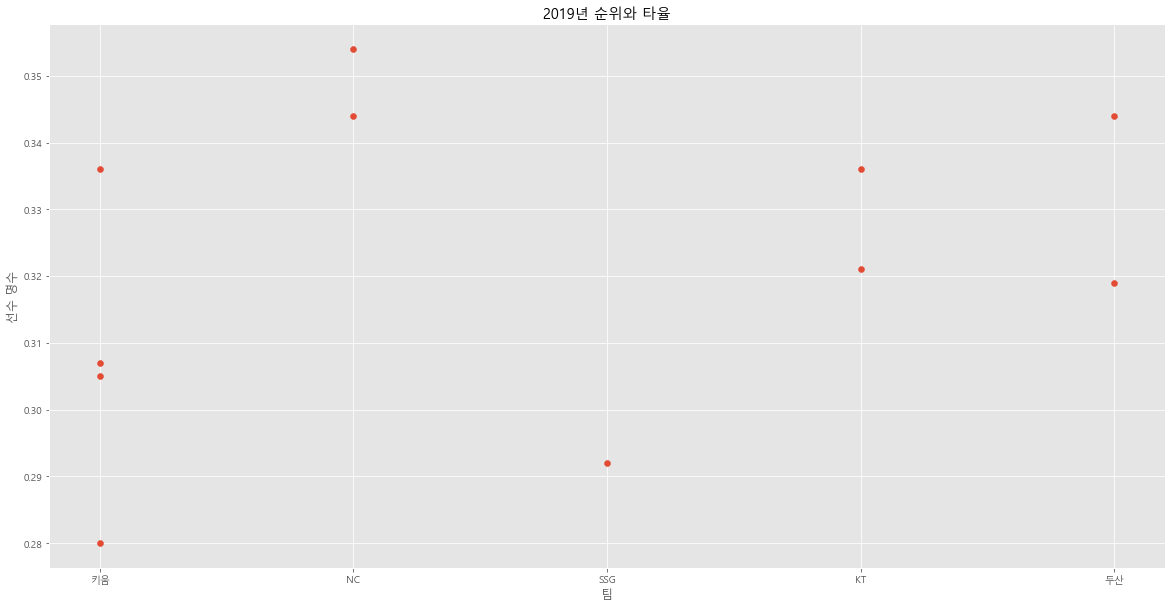

In [25]:
hypo3_df_2019=hypo3_df.loc[hypo3_df.연도==19]
hypo3_df_2019.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2019년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2019.팀, hypo3_df_2019.타율)
plt.show()

In [26]:
team_df_2020

,팀명,경기,승,패,무,타율,평균자책점,승률
0,NC 다이노스,144,83,55,6,0.291,4.58,0.601
1,두산 베어스,144,79,61,4,0.293,4.31,0.564
2,KT 위즈,144,81,62,1,0.284,4.54,0.566
3,LG 트윈스,144,79,61,4,0.277,4.37,0.564
4,키움 히어로즈,144,80,63,1,0.269,4.39,0.559
5,KIA 타이거즈,144,73,71,0,0.274,5.13,0.507
6,롯데 자이언츠,144,71,72,1,0.276,4.64,0.497
7,삼성 라이온즈,144,64,75,5,0.268,4.78,0.460
8,SK 와이번스,144,51,92,1,0.250,5.57,0.357
9,한화 이글스,144,46,95,3,0.245,5.28,0.326


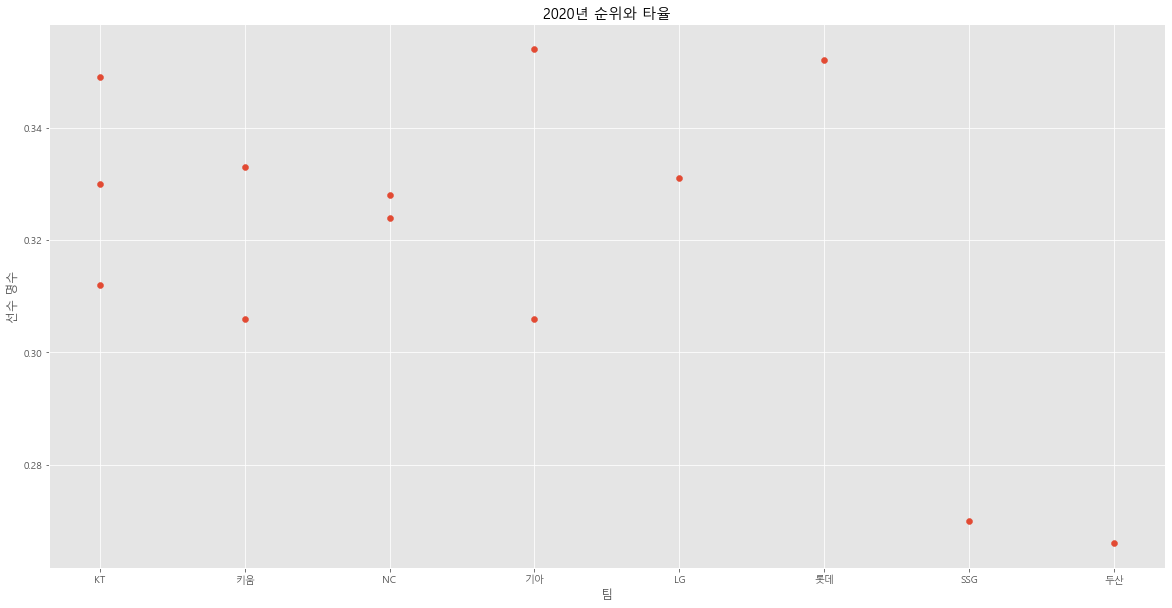

In [27]:
hypo3_df_2020=hypo3_df.loc[hypo3_df.연도==20]
hypo3_df_2020.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2020년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2020.팀, hypo3_df_2020.타율)
plt.show()

In [28]:
team_df_2021

,팀명,경기,승,패,무,타율,평균자책점,승률
0,KT 위즈,144,76,59,9,0.265,3.67,0.563
1,두산 베어스,144,71,65,8,0.268,4.26,0.522
2,삼성 라이온즈,144,76,59,9,0.267,4.30,0.563
3,LG 트윈스,144,72,58,14,0.250,3.57,0.554
4,키움 히어로즈,144,70,67,7,0.259,4.31,0.511
5,SSG 랜더스,144,66,64,14,0.261,4.82,0.508
6,NC 다이노스,144,67,68,9,0.261,4.54,0.496
7,롯데 자이언츠,144,65,71,8,0.278,5.37,0.478
8,KIA 타이거즈,144,58,76,10,0.248,4.89,0.433
9,한화 이글스,144,49,83,12,0.237,4.65,0.371


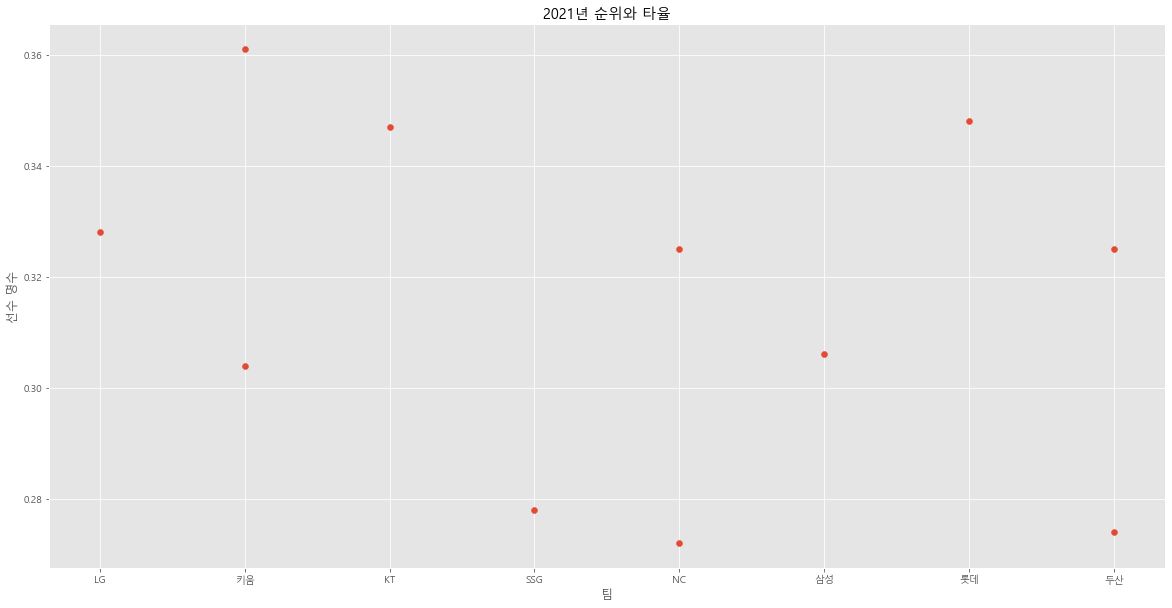

In [38]:
team_df_2021
hypo3_df_2021=hypo3_df.loc[hypo3_df.연도==21]
hypo3_df_2021.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2021년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2021.팀, hypo3_df_2021.타율)
plt.show()

In [39]:
team_df_2022

,팀명,경기,승,패,무,타율,평균자책점,승률
0,SSG 랜더스,144,88,52,4,0.254,3.87,0.629
1,키움 히어로즈,144,80,62,2,0.252,3.79,0.563
2,LG 트윈스,144,87,55,2,0.269,3.33,0.613
3,KT 위즈,144,80,62,2,0.254,3.51,0.563
4,KIA 타이거즈,144,70,73,1,0.272,4.20,0.490
5,NC 다이노스,144,67,74,3,0.257,3.90,0.475
6,삼성 라이온즈,144,66,76,2,0.270,4.29,0.465
7,롯데 자이언츠,144,64,76,4,0.267,4.45,0.457
8,두산 베어스,144,60,82,2,0.255,4.45,0.423
9,한화 이글스,144,46,96,2,0.245,4.83,0.324


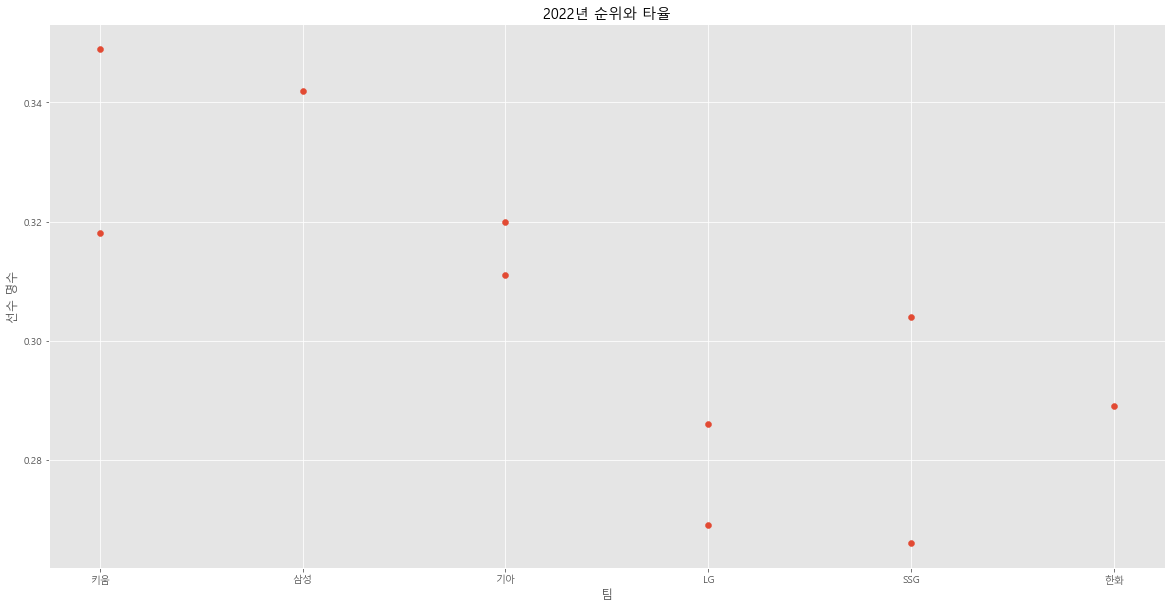

In [30]:
hypo3_df_2022=hypo3_df.loc[hypo3_df.연도==22]
hypo3_df_2022.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2022년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2022.팀, hypo3_df_2022.타율)
plt.show()

In [31]:
team_df_2023

,팀명,경기,승,패,무,타율,평균자책점,승률
0,LG 트윈스,144,86,56,2,0.279,3.67,0.606
1,KT 위즈,144,79,62,3,0.265,3.94,0.560
2,SSG 랜더스,144,76,65,3,0.260,4.37,0.539
3,NC 다이노스,144,75,67,2,0.270,3.83,0.528
4,두산 베어스,144,74,68,2,0.255,3.92,0.521
5,KIA 타이거즈,144,73,69,2,0.276,4.13,0.514
6,롯데 자이언츠,144,68,76,0,0.265,4.15,0.472
7,삼성 라이온즈,144,61,82,1,0.263,4.60,0.427
8,한화 이글스,144,58,80,6,0.241,4.38,0.420
9,키움 히어로즈,144,58,83,3,0.261,4.42,0.411


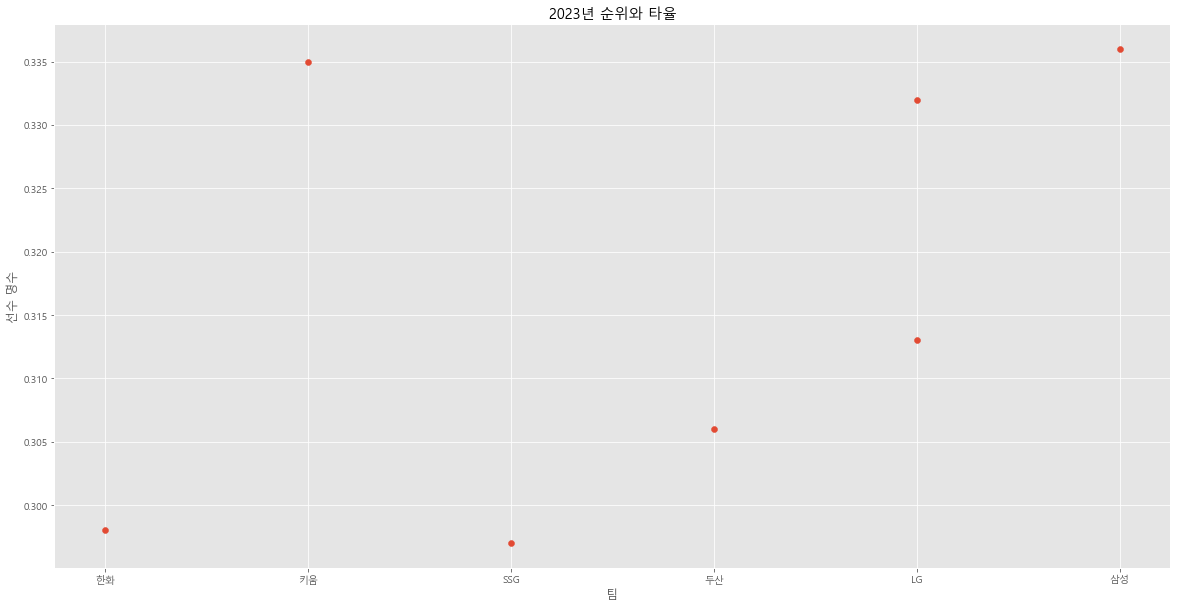

In [32]:
hypo3_df_2023=hypo3_df.loc[hypo3_df.연도==23]
hypo3_df_2023.sort_values('타율', ascending=False)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.title('2023년 순위와 타율')
plt.xlabel('팀', size=12)
plt.ylabel('선수 명수', size=12)
plt.scatter(hypo3_df_2023.팀, hypo3_df_2023.타율)
plt.show()

먼저 이 부분까지 실행하여 팀 순위와 타율을 살펴보았다. 3할 이상의 타자들만을 조사하였다. 그리고 나서 명확한 비교를 위해 지난 10년 간의 팀 순위 평균과 타율의 평균을 내었다.

In [33]:
samsung_avg_grade=(1+1+2+9+9+6+8+8+3+7+8)/11
NC_avg_grade= (7+3+3+2+4+10+5+1+7+6+4)/11
KIA_avg_grade=(8+8+7+5+1+5+7+6+9+5+6)/11
SSG_avg_grade=(6+5+5+6+5+1+3+9+6+1+3)/11
KT_avg_grade=(10+10+10+9+6+3+1+4+2)/9
LG_avg_grade=(3+4+9+4+6+8+4+4+4+3+1)/11
lotte_avg_grade=(5+7+8+8+3+7+10+7+8+8+7)/11
hanhwa_avg_grade=(9+9+6+7+8+3+9+10+10+10+9)/11
doosan_avg_grade=(2+6+1+1+2+2+1+2+2+9+5)/11
kiwoom_avg_grade=(4+2+4+3+7+4+2+5+5+2+10)/11
print(round(samsung_avg_grade, 2),round(NC_avg_grade, 2),round(KIA_avg_grade, 2),round(SSG_avg_grade, 2),round(KT_avg_grade, 2),round(LG_avg_grade, 2),round(lotte_avg_grade, 2),round(hanhwa_avg_grade, 2),round(doosan_avg_grade, 2),round(kiwoom_avg_grade, 2))

5.64 4.73 6.09 4.55 6.11 4.55 7.09 8.18 3.0 4.36


In [34]:
y1=[round(samsung_avg_grade, 2),round(NC_avg_grade, 2),round(KIA_avg_grade, 2),round(SSG_avg_grade, 2),round(KT_avg_grade, 2),round(LG_avg_grade, 2),round(lotte_avg_grade, 2),round(hanhwa_avg_grade, 2),round(doosan_avg_grade, 2),round(kiwoom_avg_grade, 2)]
y1.sort()
y1

[3.0, 4.36, 4.55, 4.55, 4.73, 5.64, 6.09, 6.11, 7.09, 8.18]

In [35]:
samsung_avg_bestppl=round((2+2+3+1+1+0+0+0+1+1+1)/11, 2)
NC_avg_bestppl=round((0+2+1+2+2+0+2+2+2+0+0)/11 ,2)
KIA_avg_bestppl=round((0+0+0+0+3+2+0+2+0+2+0)/11 ,2)
SSG_avg_bestppl=round((1+0+0+1+1+1+1+1+1+2+1)/11 ,2)
KT_avg_bestppl=round((1+0+0+1+2+3+1+0+0)/9, 2)
LG_avg_bestppl=round((2+0+0+1+0+2+0+0+1+2+2)/11, 2)
lotte_avg_bestppl=round((1+1+2+2+1+2+0+1+1+0+0)/11, 2)
hanhwa_avg_bestppl=round((0+1+2+1+1+0+0+0+0+1+1)/11, 2)
doosan_avg_bestppl=round((0+0+1+2+2+3+2+1+2+0+0)/11, 2)
kiwoom_avg_bestppl=round((2+3+3+0+1+1+4+2+1+2+1)/11, 2)
print(samsung_avg_bestppl,NC_avg_bestppl,KIA_avg_bestppl,SSG_avg_bestppl,KT_avg_bestppl,LG_avg_bestppl,lotte_avg_bestppl,hanhwa_avg_bestppl,doosan_avg_bestppl,kiwoom_avg_bestppl)

1.09 1.18 0.82 0.91 0.89 0.91 1.0 0.64 1.18 1.82


In [36]:
y2=[1.09, 1.18, 0.82, 0.91, 0.89, 0.91, 1.0, 0.64, 1.18, 1.82]
y2.sort()
y2

[0.64, 0.82, 0.89, 0.91, 0.91, 1.0, 1.09, 1.18, 1.18, 1.82]

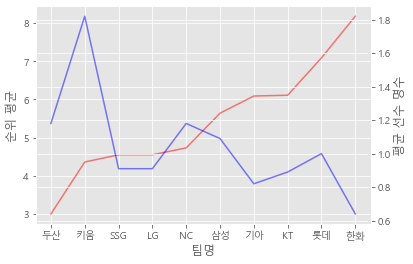

<Figure size 1440x720 with 0 Axes>

In [37]:
x=['두산', '키움', 'SSG', 'LG', 'NC', '삼성', '기아', 'KT', '롯데', '한화']
y2=[1.18, 1.82, 0.91, 0.91, 1.18, 1.09, 0.82, 0.89, 1.0, 0.64]
fig, ax1=plt.subplots()
ax1.plot(x,y1, color='red', alpha=0.5)
ax1.set_xlabel('팀명', size=12)
ax1.set_ylabel('순위 평균', size=12)
ax2=ax1.twinx()
ax2.plot(x,y2, color='blue', alpha=0.5)
ax2.set_ylabel('평균 선수 명수', size=12)
plt.style.use('ggplot')
fig=plt.figure(figsize=(20,10))
plt.show()

KT의 경우, 2015년에 창설된 구단이기 때문에, 2015년 이후의 통계치만을 사용하였다. <br>
빨간 선그래프가 평균 순위, 파란 선그래프가 3할 이상의 타자 평균 선수 명수를 나타낸다. 

#### 결과 

표에서 순위 평균이 낮을수록, 평균 선수 명수가 많을수록 좋은 수치였다. 팀 순위와 개인의 3할 이상의 좋은 타율은 아무런 상관관계가 없었다. 물론 3할 이상 치는 타자들이 팀에 많다면 출루를 할 가능성이 높아 점수를 낼 수 있었겠지만, 야구는 팀 스포츠이기 때문에, 개인이 뛰어나게 잘한다고 해서 팀에 막대한 영향을 주지는 않는다. <br>
이 가설 또한 아무런 상관관계가 없다는 결론이 나왔다.  

### 결론

가설 1: 타율이 높을수록 홈런 개수가 많을 것이다 <br>
    => 상관관계가 없다 <br>
    
가설 2: WAR가 높을수록 타율이 높을 것이다 <br>
    => 상관관계가 없다 <br>
가설 3: 타율이 3할이 넘는 선수가 많을수록 팀 순위가 높을 것이다 <br>
    => 상관관계가 없다 <br>

### 느낀 점 

다양한 데이터를 분석해 보는 것이 흥미로웠다. 무엇보다 데이터 분석을 위해 구글링을 하고, 알게 된 지식을 직접 주피터 노트북에 적용해보면서 발전하고 있다는 것이 느껴져서 좋았던 것 같다. 어떻게 하면 간결하게 코드를 짤 수 있을까 고민도 해보고, 한 눈에 들어오는 표를 만들기 위해서는 어떤 조건이 필요할지 등을 고민해보면서 질적 성장이 이루어졌던 것 같다. <br>

가설의 측면에서, 모든 가설이 상관관계가 없다는 결론이 나와서 아쉬웠다. 물론 결론을 알고 시작한 데이터 분석은 아니었으나, 뚜렷한 상관관계가 나왔더라면 조금 더 희열을 느낄 수 있었을 것 같다. 이 부분에 대한 아쉬움이 남아있다. <br>

또한 깔끔하게 코드를 작성한다고 노력하였으나, 생각만큼 깔끔하게 나오지 않은 것 같아서 아쉬움이 많다. 이러한 부분들을 잘 보완하여 다음에 더 깔끔하고 효율적인 데이터 분석을 하고 싶다.

### 출처 

KBO 팀 순위 기록: https://www.koreabaseball.com/Record/History/Team/Record.aspx

스탯티즈 개인 순위 기록: http://www.statiz.co.kr/stat.php